In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data\sofifa.player_updated.csv')

In [3]:
df.head()

,_id,name,position,age,base,potential,growth,id,hieght,weight,foot,mValue,wage,rc
0,6626889b0cf284fe712f663d,M. van Ewijk,RB RWB,22,75,82,7,251626,"175cm / 5'9""",70kg / 154lbs,Right,11M,31K,23.1M
1,6626889b0cf284fe712f663e,B. Gruda,CF CAM RW,19,68,86,18,272612,"178cm / 5'10""",70kg / 154lbs,Left,3.1M,7K,7.5M
2,6626889b0cf284fe712f663f,Bruno Guimarães,CM CDM,25,84,87,3,247851,"182cm / 6'0""",74kg / 163lbs,Right,55.5M,145K,109.6M
3,6626889b0cf284fe712f6640,Pau Cubarsí,CB,16,64,83+3,19,278046,"182cm / 6'0""",75kg / 165lbs,Right,1.4M,1K,3.7M
4,6626889b0cf284fe712f6641,C. Palmer,RM CAM,21,77,84-2,7,257534,"189cm / 6'2""",74kg / 163lbs,Left,21.5M,65K,45.2M


In [4]:
df.shape

(17161, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17161 entries, 0 to 17160
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   _id        17161 non-null  object
 1   name       17161 non-null  object
 2   position   17161 non-null  object
 3   age        17161 non-null  int64 
 4   base       17161 non-null  object
 5   potential  17161 non-null  object
 6   growth     17161 non-null  int64 
 7   id         17161 non-null  int64 
 8   hieght     17161 non-null  object
 9   weight     17161 non-null  object
 10  foot       17161 non-null  object
 11  mValue     17161 non-null  object
 12  wage       17161 non-null  object
 13  rc         17161 non-null  object
dtypes: int64(3), object(11)
memory usage: 1.8+ MB


In [6]:
df.describe()

,age,growth,id
count,17161.000000,17161.000000,17161.000000
mean,23.397413,7.154944,248976.676068
std,4.883823,5.891724,39792.480417
min,15.000000,-1.000000,41.000000
25%,20.000000,1.000000,236944.000000
50%,22.000000,7.000000,265020.000000
75%,26.000000,11.000000,272334.000000
max,44.000000,28.000000,280313.000000


In [7]:
corr_mt = df.corr(numeric_only = True)
corr_mt

,age,growth,id
age,1.000000,-0.856823,-0.621616
growth,-0.856823,1.000000,0.439867
id,-0.621616,0.439867,1.000000


In [8]:
df['pos1'] = df['position'].str.split().str[0]

In [9]:
df['pos2'] = df['position'].str.split().str[1]

In [10]:
df['age'] = df['age'].astype(int)

In [11]:
df['base_potential'] = df['base'].str.split(r'[+-]').str[0].astype(int)

In [12]:
df['potential'] = df['potential'].str.split(r'[+-]').str[0].astype(int)

In [13]:
df['hieght'] = df['hieght'].str.split('/').str[0].str.split('cm').str[0].astype(int)

In [14]:
df['weight'] = df['weight'].str.split('/').str[0].str.split('kg').str[0].astype(int)

In [15]:
def convert_to_millions(value):
    if 'M' in value:
        return float(value.replace('M', ''))
    elif 'K' in value:
        return float(value.replace('K', '')) / 1000  # Convert K to M
    else:
        return float(value)

In [16]:
df['market_value_millions'] = df['mValue'].apply(convert_to_millions)

In [17]:
def convert_to_dollars(value):
    if 'K' in value:
        return float(value.replace('K', '')) * 1000  # Convert K to dollars (multiply by 1000)
    else:
        return float(value)

In [18]:
df['wages_dollars'] = df['wage'].apply(convert_to_dollars)

In [19]:
df['release_clause'] = df['rc'].apply(convert_to_millions)

In [20]:
columns = ['_id','name','base','id','mValue','wage','rc','position']

In [21]:
df = df.drop(columns=columns)

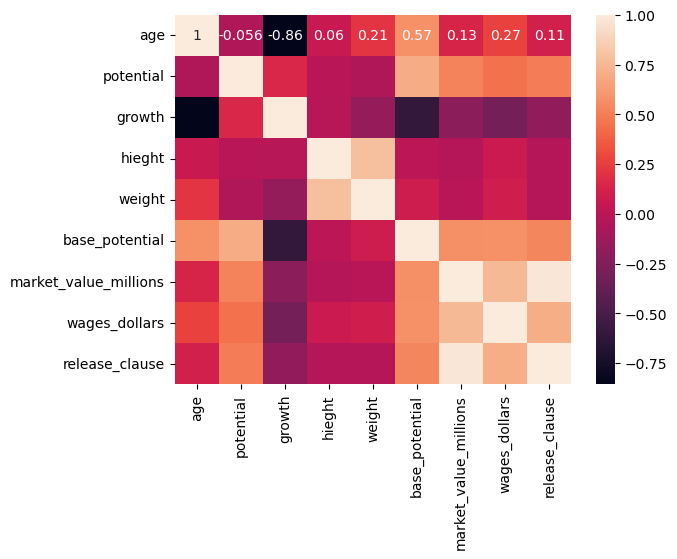

In [23]:
corr_mt = df.corr(numeric_only=True)

sns.heatmap(corr_mt, annot=True)
plt.show()

## Barplots

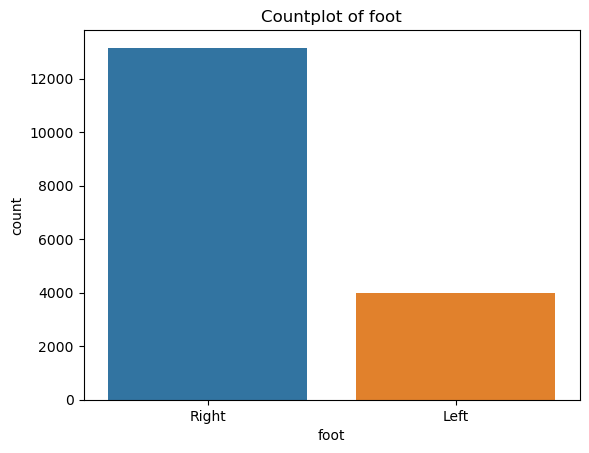

In [24]:
sns.countplot(x = df['foot'], data = df)
plt.title('Countplot of foot')
plt.show()

### Insights:
##### most players are right footed

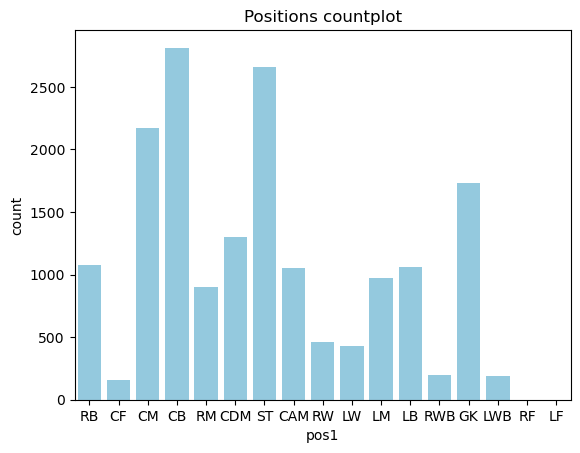

In [25]:
sns.countplot(x = df['pos1'], data = df, color='skyblue')
plt.title('Positions countplot')
plt.show()

### Insights 
##### Most players are of positions CM, CB, ST, GK

## Histograms 

C:\Users\HP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


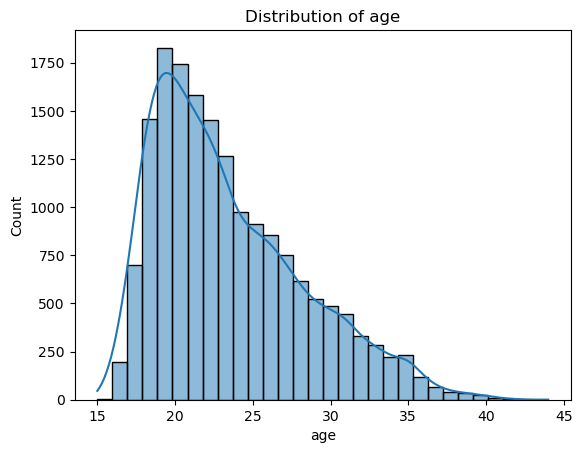

In [26]:
sns.histplot(x = df['age'], data = df, kde= True, bins=30)
plt.title('Distribution of age')
plt.show()

### Insights
##### most players are in the agegroup 19-23

C:\Users\HP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


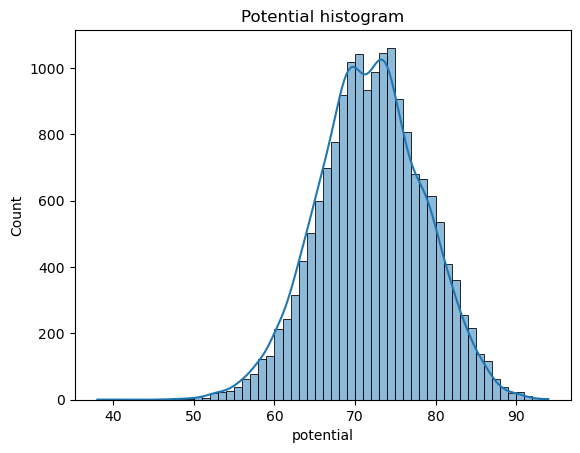

In [27]:
sns.histplot(x = df['potential'], data = df, kde = True, bins = 56)
plt.title('Potential histogram')
plt.show()

C:\Users\HP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


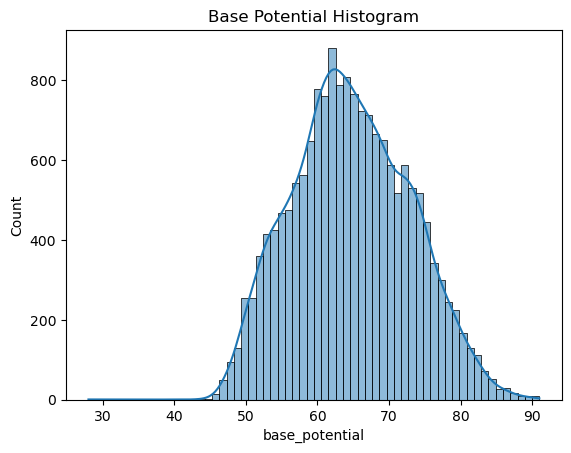

In [28]:
sns.histplot(x = df['base_potential'], kde = True, bins = 62)
plt.title('Base Potential Histogram')
plt.show()

C:\Users\HP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


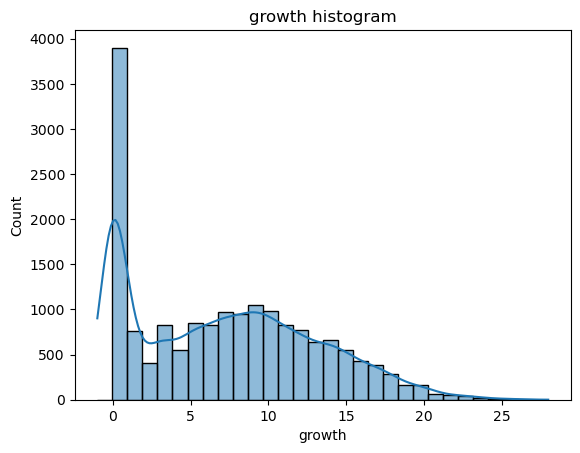

In [29]:
sns.histplot(x = df['growth'], kde = True, bins = 30)
plt.title('growth histogram')
plt.show()

C:\Users\HP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


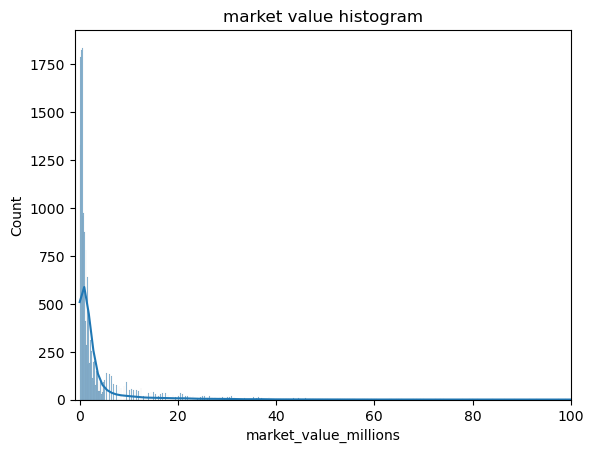

In [30]:
sns.histplot(x = df['market_value_millions'], kde = True)
plt.xlim(-1, 100)
plt.title("market value histogram")
plt.show()

C:\Users\HP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


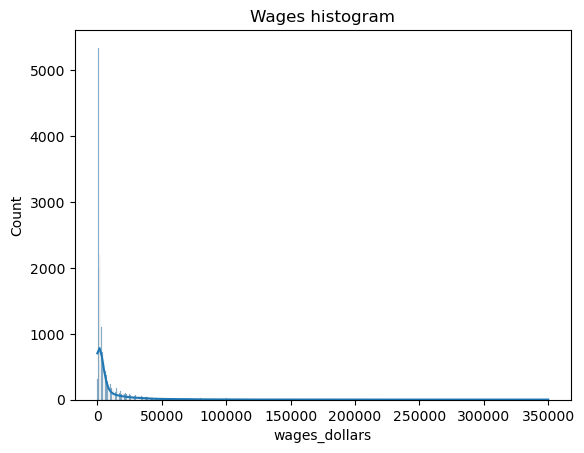

In [31]:
sns.histplot(x = df['wages_dollars'], kde = True)
plt.title('Wages histogram')
plt.show()

C:\Users\HP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


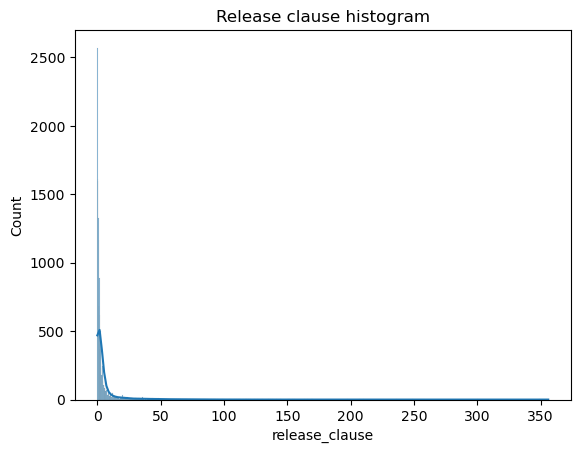

In [32]:
sns.histplot(x = df['release_clause'], kde =True)
plt.title('Release clause histogram')
plt.show()

C:\Users\HP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


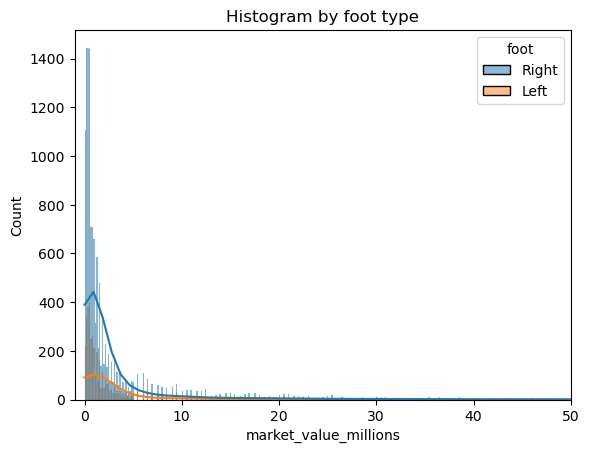

In [33]:
sns.histplot(x = df['market_value_millions'], kde = True, hue = df['foot'])
plt.title('Histogram by foot type')
plt.xlim(-1,50)
plt.show()

In [34]:
categories_to_include = ['GK','ST','CB','CM']
filtered_df = df[df['pos1'].isin(categories_to_include)]

C:\Users\HP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


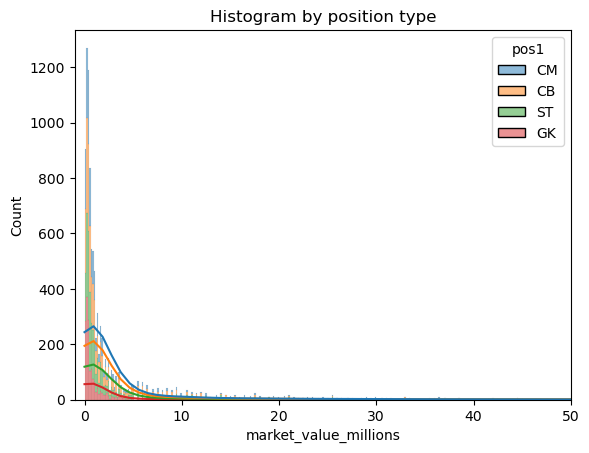

In [35]:
sns.histplot(data=filtered_df, x='market_value_millions', hue='pos1', multiple='stack', kde=True)
plt.title('Histogram by position type')
plt.xlim(-1,50)
plt.show()

### Scatter PLot

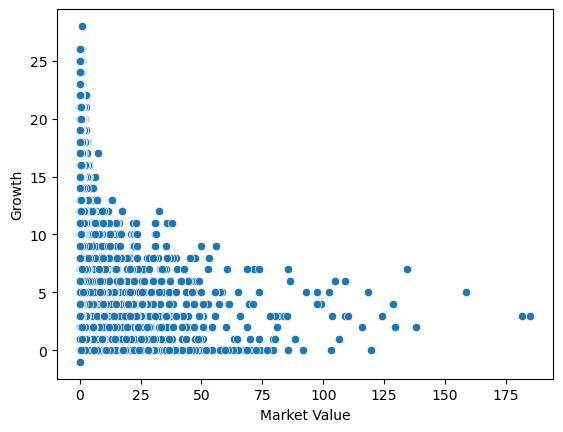

In [36]:
sns.scatterplot(x = df['market_value_millions'], y = df['growth'])
plt.xlabel('Market Value')
plt.ylabel('Growth')
plt.show()

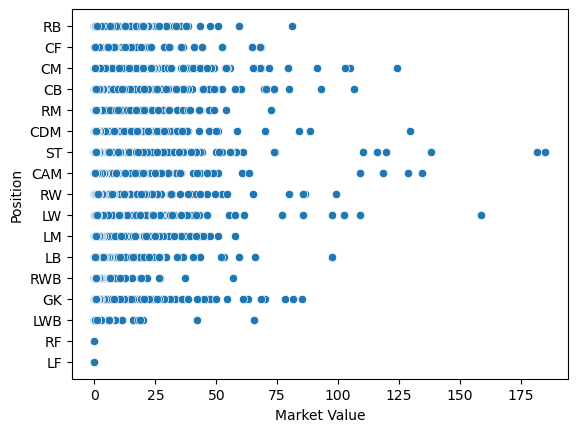

In [37]:
sns.scatterplot(x = df['market_value_millions'], y = df['pos1'])
plt.xlabel('Market Value')
plt.ylabel('Position')
plt.show()

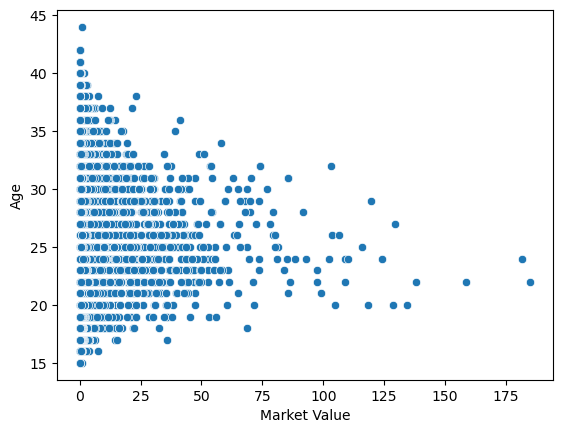

In [38]:
sns.scatterplot(x = df['market_value_millions'], y = df['age'])
plt.xlabel('Market Value')
plt.ylabel('Age')
plt.show()

### Lineplot

C:\Users\HP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


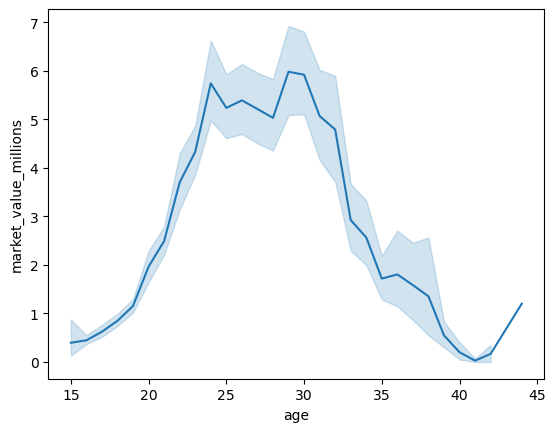

In [39]:
sns.lineplot(y = df['market_value_millions'], x = df['age'])
plt.show()

C:\Users\HP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


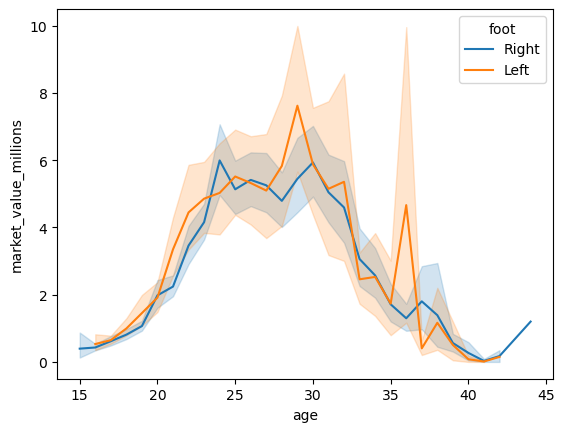

In [40]:
sns.lineplot(data=df, x="age", y="market_value_millions", hue="foot")
plt.show()

C:\Users\HP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


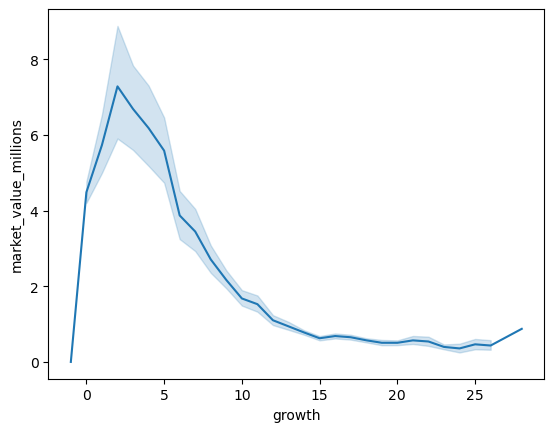

In [41]:
sns.lineplot(y = df['market_value_millions'], x = df['growth'])
plt.show()

C:\Users\HP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


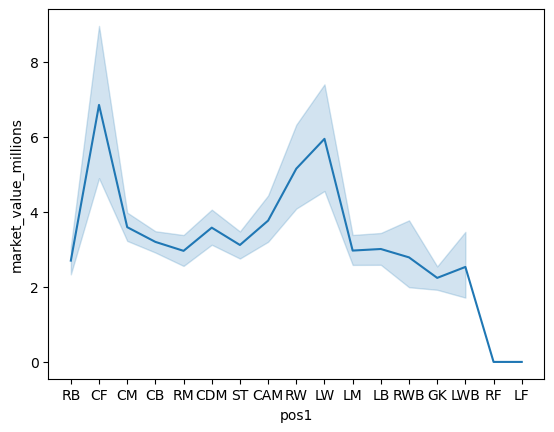

In [42]:
sns.lineplot(y = df['market_value_millions'], x = df['pos1'])
plt.show()

C:\Users\HP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


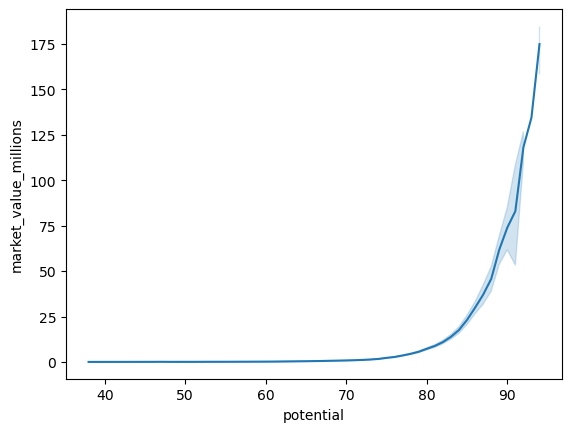

In [43]:
sns.lineplot(y = df['market_value_millions'], x = df['potential'])
plt.show()

C:\Users\HP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


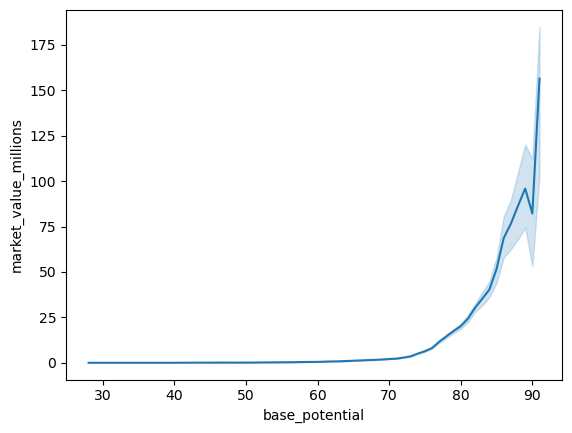

In [44]:
sns.lineplot(y = df['market_value_millions'], x = df['base_potential'])
plt.show()

### Transformer


In [45]:
df.loc[df['pos2'].isnull(), 'pos2'] = 'None'

In [46]:
X = df.drop(columns='market_value_millions')
y = df['market_value_millions']

In [112]:
df.isnull().sum()

age                      0
potential                0
growth                   0
hieght                   0
weight                   0
foot                     0
pos1                     0
pos2                     0
base_potential           0
market_value_millions    0
wages_dollars            0
release_clause           0
dtype: int64

#### Train test split

In [105]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [106]:
X_test['pos1'].nunique()

15

In [107]:
cat_list = [] #list for categorical objects
num_list = [] #list for numerical objects

for i in list(X_train.columns):
    if X_train[i].dtype == "object":
        cat_list.append(i)
    else:
        num_list.append(i)

        
        
print(cat_list)
print("__"*70)
print(num_list)

['foot', 'pos1', 'pos2']
____________________________________________________________________________________________________________________________________________
['age', 'potential', 'growth', 'hieght', 'weight', 'base_potential', 'wages_dollars', 'release_clause']


In [108]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline

cat_pipe = Pipeline([
                     ("lbe", OrdinalEncoder())])

num_pipe = Pipeline([
                     ("std_scl",StandardScaler())])


ct = ColumnTransformer([
                        ('cat_pipe', cat_pipe, cat_list),
                       ("num_pipe", num_pipe, num_list)])

In [109]:
X_train_trf = ct.fit_transform(X_train)
X_test_trf = ct.transform(X_test)

In [51]:
X_train_df = pd.DataFrame(X_train_trf)

In [52]:
X_test_df = pd.DataFrame(X_test_trf)

## Models 

In [53]:
from sklearn.metrics import r2_score, mean_squared_error
models = []
r2_scores = []
mses = []

###  Linear regression

In [54]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_df, y_train)
models.append('Linear Regression')

In [55]:
r2_score(y_train, lr.predict(X_train_df)), r2_score(y_test, lr.predict(X_test_df))

(0.9633357996571775, 0.951421054020456)

In [56]:
r2_scores.append(r2_score(y_test, lr.predict(X_test_df)))
mses.append(mean_squared_error(y_test, lr.predict(X_test_df)))

### Ridge, Lasso Regressor

In [57]:
from sklearn.linear_model import Lasso, Ridge

lasso = Lasso(0.1)
ridge = Ridge(alpha=0.001)

lasso.fit(X_train_df, y_train)
ridge.fit(X_train_df, y_train)
models.append('Ridge')
models.append('Lasso')

In [58]:
r2_score(y_train, ridge.predict(X_train_df)), r2_score(y_test, ridge.predict(X_test_df))

(0.9633357996571669, 0.951421052761265)

In [59]:
r2_score(y_train, lasso.predict(X_train_df)), r2_score(y_test, lasso.predict(X_test_df))

(0.962506832993891, 0.9501699701498824)

In [60]:
r2_scores.append(r2_score(y_test, ridge.predict(X_test_df)))
mses.append(mean_squared_error(y_test, ridge.predict(X_test_df)))
r2_scores.append(r2_score(y_test, lasso.predict(X_test_df)))
mses.append(mean_squared_error(y_test, lasso.predict(X_test_df)))

### KNN Regressor

In [61]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train_df, y_train)
models.append('KNN')

In [62]:
r2_score(y_train, knn.predict(X_train_df)), r2_score(y_test, knn.predict(X_test_df))

(0.953243179087792, 0.9130174759076048)

In [63]:
r2_scores.append(r2_score(y_test, knn.predict(X_test_df)))
mses.append(mean_squared_error(y_test, knn.predict(X_test_df)))

### Xgboost Regressor

In [64]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train_df, y_train)
models.append('XGboost')

In [65]:
r2_score(y_train, xgb.predict(X_train_df)), r2_score(y_test, xgb.predict(X_test_df))

(0.9998202156740941, 0.9913122071160129)

In [66]:
r2_scores.append(r2_score(y_test, xgb.predict(X_test_df)))
mses.append(mean_squared_error(y_test, xgb.predict(X_test_df)))

### Adaboost Regressor

In [67]:
# from sklearn.ensemble import AdaBoostRegressor

# ada = AdaBoostRegressor()
# ada.fit(X_train_df, y_train)
# models.append('Adaboost')

In [68]:
# r2_score(y_train, ada.predict(X_train_df)), r2_score(y_test, ada.predict(X_test_df))

In [69]:
# r2_scores.append(r2_score(y_test, ada.predict(X_test_df)))
# mses.append(mean_squared_error(y_test, ada.predict(X_test_df)))

### Bagging Regressor

In [70]:
from sklearn.ensemble import BaggingRegressor

bagg = BaggingRegressor()
bagg.fit(X_train_df, y_train)
models.append('Bagging')

In [71]:
r2_score(y_train, bagg.predict(X_train_df)), r2_score(y_test, bagg.predict(X_test_df))

(0.9977843821148156, 0.9863991212184557)

In [72]:
r2_scores.append(r2_score(y_test, bagg.predict(X_test_df)))
mses.append(mean_squared_error(y_test, bagg.predict(X_test_df)))

### Random Forest Regressor

In [73]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train_df, y_train)
models.append('Random Forest')

In [74]:
r2_score(y_train, rf.predict(X_train_df)), r2_score(y_test, rf.predict(X_test_df))

(0.998514158188929, 0.988509332013656)

In [75]:
r2_scores.append(r2_score(y_test, rf.predict(X_test_df)))
mses.append(mean_squared_error(y_test, rf.predict(X_test_df)))

In [76]:
scores_data = {'Model': models, 'R2 Score': r2_scores, 'Mses': mses}
scores_data_df = pd.DataFrame(scores_data)

In [77]:
scores_data_df

,Model,R2 Score,Mses
0,Linear Regression,0.951421,3.080827
1,Ridge,0.951421,3.080827
2,Lasso,0.950170,3.160170
3,KNN,0.913017,5.516343
4,XGboost,0.991312,0.550971
5,Bagging,0.986399,0.862554
6,Random Forest,0.988509,0.728726


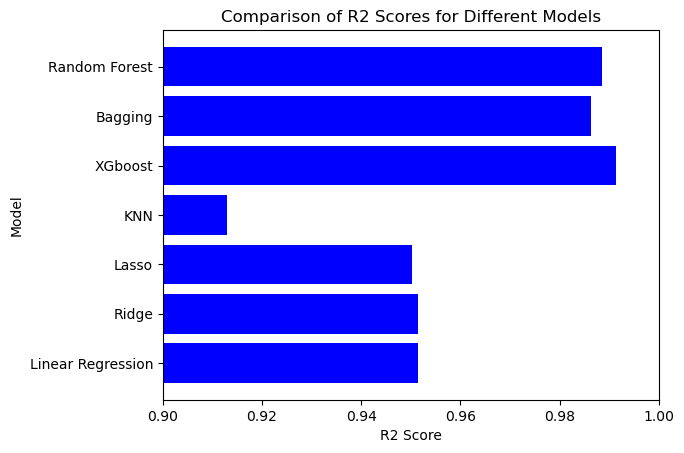

In [78]:
plt.barh(scores_data_df['Model'], scores_data_df['R2 Score'], color='blue')
plt.xlabel('R2 Score')
plt.ylabel('Model')
plt.title('Comparison of R2 Scores for Different Models')
plt.xlim(0.9,1)
plt.show()

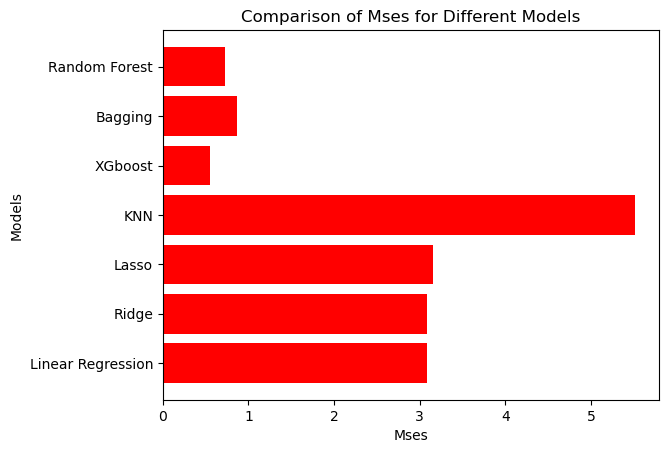

In [79]:
plt.barh(scores_data_df['Model'], scores_data_df['Mses'], color='red')
plt.xlabel('Mses')
plt.ylabel('Models')
plt.title('Comparison of Mses for Different Models')
plt.show()

C:\Users\HP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

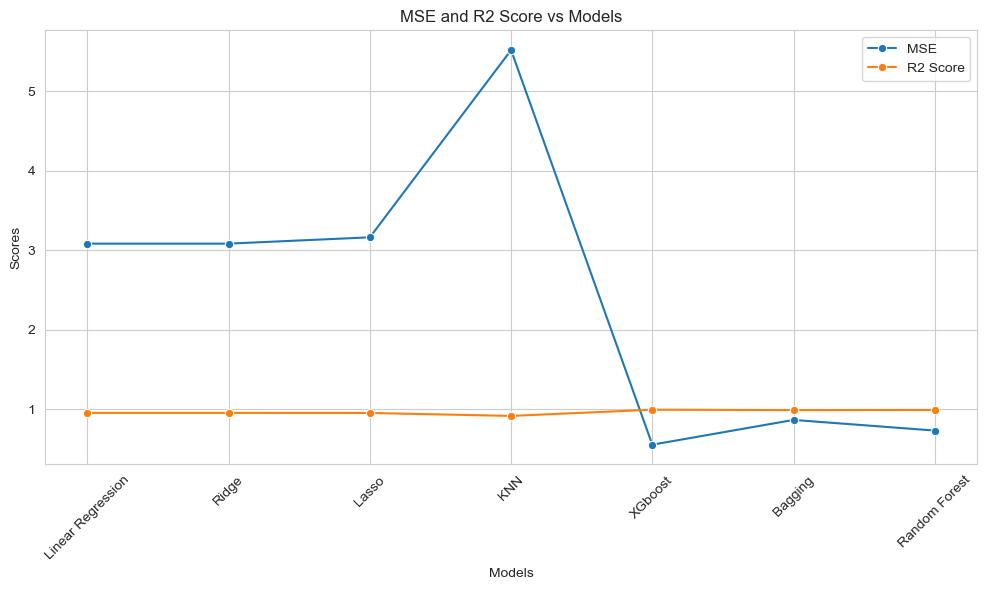

In [80]:
sns.set_style("whitegrid")

# Initialize the plot
plt.figure(figsize=(10, 6))

# Plot MSE
sns.lineplot(data=scores_data_df, x='Model', y='Mses', marker='o', label='MSE')

# Plot R2 score
sns.lineplot(data=scores_data_df, x='Model', y='R2 Score', marker='o', label='R2 Score')

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('MSE and R2 Score vs Models')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

### plotting

In [81]:
y_pred = xgb.predict(X_test_df)

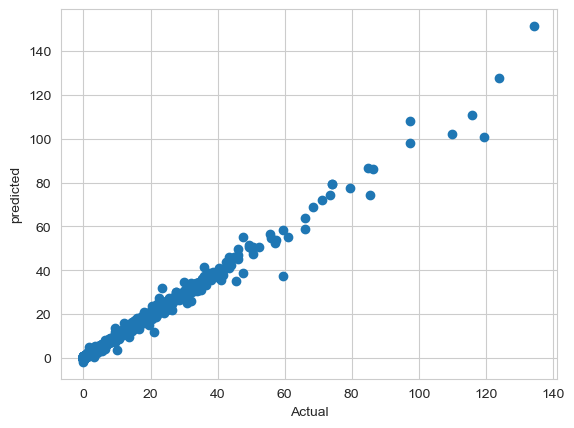

In [82]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.show()

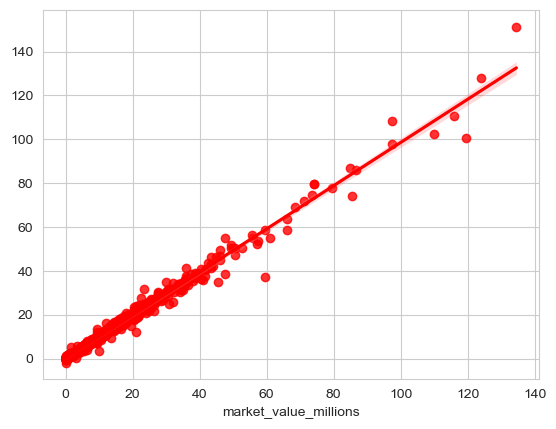

In [83]:
sns.regplot(x=y_test, y = y_pred, color= 'red')
plt.show()